# REPRESENTACIÓN DE TEXTO Y RECUPERACIÓN DE TEXTO

En primer lugar importamos algunas bibliotecas útiles y descargamos algunos corpus y paquetes populares de nltk.

In [1]:
import nltk
import string
import math
import numpy
import matplotlib
import numpy as np
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\Usuario\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nlt

True



# Ejemplo 1

Obtener una lista de palabras clave a partir de un texto.

Usaremos el siguiente texto:

*The Chinese province at the center of the novel coronavirus outbreak reported a record spike in deaths Thursday, bringing the total number to more than 1300 people globally, as experts warned the epidemic could create havoc in less prepared countries.*



In [2]:

sentence = "The Chinese province at the center of the novel coronavirus outbreak reported a record spike in deaths Thursday, bringing the total number to more than 1300 people globally, as experts warned the epidemic could create havoc in less prepared countries."


Separamos el texto en tokens y los representamos en minúscula.

In [3]:
tokens_lowercase = [word.lower() for word in nltk.word_tokenize(sentence)]

Seleccionamos una lista de "stopwords" y un "stemmer.

In [4]:
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

Tomamos la lista de tokens y eliminamos los símbolos de puntación, las stopwords y transformamos a cada token en su correpondiente stem. El resultado es una lista de términos.

In [5]:
terms =[]
for token in tokens_lowercase:
  # Process each token
  if token not in string.punctuation:
    if token not in stopwords:
      token = stemmer.stem(token)
      terms.append(token)
print(terms)

['chines', 'provinc', 'center', 'novel', 'coronaviru', 'outbreak', 'report', 'record', 'spike', 'death', 'thursday', 'bring', 'total', 'number', '1300', 'peopl', 'global', 'expert', 'warn', 'epidem', 'could', 'creat', 'havoc', 'less', 'prepar', 'countri']


---
# Ejemplo 2

Gener una representación vectorial de un pequeño corpus.

Creamos un corpus de juguete.



In [6]:
d1 = "El río Danubio pasa por Viena, su color es azul."
d2 = "El caudal de un río asciende en Invierno."
d3 = "El río Rhin y el río Danubio tienen mucho caudal."
d4 = "Si un río es navegable, es porque tiene mucho caudal." 

raw_corpus = [d1,d2,d3,d4]

Identificamos el conjunto de términos (palabras clave) del corpus y tranformamos a cada documento en una lista de términos. En este caso optamos por eliminar stopwords (en español) pero no aplicaremos stemming.

In [7]:
stopwords_spanish = nltk.corpus.stopwords.words('spanish')
term_set = set ()
corpus =[]
for  raw_document in raw_corpus:
  tokens_lowercase = [word.lower() for word in nltk.word_tokenize(raw_document)]
  terms =[]
  for token in tokens_lowercase:
    if token not in string.punctuation:
      if token not in stopwords_spanish:
        terms.append(token)
        term_set.add(token)        
  corpus.append(terms)  
num_documents = len(corpus)  
num_terms = len(term_set)   

Creamos un mapeo de términos a números (ids).

In [8]:
term_to_id = {}
id = 0
for term in term_set:
  term_to_id[term] = id
  id += 1

Creamos una matriz TF.

In [9]:
tf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0

for document in corpus:
  for term in set(document):
    term_id = term_to_id[term]
    tf_matrix[document_id][term_id] = float(document.count(term))
  document_id += 1


Creamos un vector IDF.

In [10]:
idf_vector = numpy.zeros(num_terms)
for term in term_set:
  term_document_frequency = 0
  for document in corpus:
    if term in document:
      term_document_frequency += 1
  idf_vector[term_to_id[term]] = math.log(float(num_documents) / float(term_document_frequency),10)

Creamos la matriz TF-IDF.

In [11]:
tfidf_matrix = numpy.multiply(tf_matrix,idf_vector)

Normalizamos la matrtiz TF-IDF.

In [12]:
normalized_tfidf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0
for document in tfidf_matrix:
  document_norm = numpy.linalg.norm(document)
  normalized_tfidf_matrix[document_id] = [w/document_norm for w in document]
  document_id += 1

Mostramos resultados.

In [13]:
print(term_to_id)
numpy.set_printoptions(precision=3)
print('TF')
print(tf_matrix)
print('IDF')
print(idf_vector)
print('TF_IDF')
print(tfidf_matrix)
print('TF_IDF NORMALIZADA')
print(normalized_tfidf_matrix)

{'navegable': 0, 'si': 1, 'danubio': 2, 'asciende': 3, 'viena': 4, 'color': 5, 'azul': 6, 'pasa': 7, 'río': 8, 'rhin': 9, 'invierno': 10, 'caudal': 11}
TF
[[0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 2. 1. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]]
IDF
[0.602 0.602 0.301 0.602 0.602 0.602 0.602 0.602 0.    0.602 0.602 0.125]
TF_IDF
[[0.    0.    0.301 0.    0.602 0.602 0.602 0.602 0.    0.    0.    0.   ]
 [0.    0.    0.    0.602 0.    0.    0.    0.    0.    0.    0.602 0.125]
 [0.    0.    0.301 0.    0.    0.    0.    0.    0.    0.602 0.    0.125]
 [0.602 0.602 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.125]]
TF_IDF NORMALIZADA
[[0.    0.    0.243 0.    0.485 0.485 0.485 0.485 0.    0.    0.    0.   ]
 [0.    0.    0.    0.7   0.    0.    0.    0.    0.    0.    0.7   0.145]
 [0.    0.    0.44  0.    0.    0.    0.    0.    0.    0.879 0.    0.182]
 [0.7   0.7   0.    0.    0.    0.    0.    0.    0.    0.

---
# Ejemplo 3
Generamos una matriz TF-IDF a partir del corpus "Inaugural" provisto por nltk.



Identificamos el conjunto de términos (palabras clave) del corpus y transformamos a cada documento en una lista de términos.

In [14]:
corpus = []
term_set = set ()
filenames = []
filename_to_id ={}

id = 0
for filename in nltk.corpus.inaugural.fileids():
  filenames.append(filename)
  filename_to_id[filename] = id
  raw_document = nltk.corpus.inaugural.raw(filename)
  tokens_lowercase = [word.lower() for word in nltk.word_tokenize(raw_document)]
  terms =[]
  for token in tokens_lowercase:
    # Process each token
    if token not in string.punctuation:
      if token not in stopwords:
        token = stemmer.stem(token)
        terms.append(token)
        term_set.add(token)        
  corpus.append(terms)
  id += 1  
num_documents = len(corpus)  
num_terms = len(term_set)   

Creamos un mapeo de términos a números (ids).

In [15]:
term_to_id = {}
id = 0
for term in term_set:
  term_to_id[term] = id
  id += 1

Creamos una matriz TF.

In [16]:
tf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0

for document in corpus:
  for term in set(document):
    term_id = term_to_id[term]
    tf_matrix[document_id][term_id] = float(document.count(term))
  document_id += 1


Creamos un vector IDF.

In [17]:
idf_vector = numpy.zeros(num_terms)
for term in term_set:
  term_document_frequency = 0
  for document in corpus:
    if term in document:
      term_document_frequency += 1
  idf_vector[term_to_id[term]] = math.log(float(num_documents) / float(term_document_frequency),10)

Creamos la matriz TF-IDF.

In [18]:
tfidf_matrix = numpy.multiply(tf_matrix,idf_vector)


Normalizamos la matrtiz TF-IDF.

In [19]:
normalized_tfidf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0
for document in tfidf_matrix:
  document_norm = numpy.linalg.norm(document)
  normalized_tfidf_matrix[document_id] = [w/document_norm for w in document]
  document_id += 1

# Ejercicios
1. Repita los pasos del ejemplo 3 sin aplicar stemming e identifique cuál es la palabra clave más representativa (según tfidf) en cada uno de los discursos.


Hacemos igual que arriba omitiendo la línea `token = stemmer.stem(token)`

In [20]:
corpus = []
term_set = set ()
filenames = []
filename_to_id ={}

id = 0
for filename in nltk.corpus.inaugural.fileids():
  filenames.append(filename)
  filename_to_id[filename] = id
  raw_document = nltk.corpus.inaugural.raw(filename)
  tokens_lowercase = [word.lower() for word in nltk.word_tokenize(raw_document)]
  terms =[]
  for token in tokens_lowercase:
    # Process each token
    if token not in string.punctuation:
      if token not in stopwords:
        terms.append(token)
        term_set.add(token)        
  corpus.append(terms)
  id += 1  
num_documents = len(corpus)  
num_terms = len(term_set) 

In [21]:
term_to_id = {}
id = 0
for term in term_set:
  term_to_id[term] = id
  id += 1

Voy a necesitar el conjunto inverso, `id_to_term` más adelante, así que ya lo preparo

In [22]:
id_to_term= {v: k for k, v in term_to_id.items()}

In [23]:
tf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0

for document in corpus:
  for term in set(document):
     term_id = term_to_id[term]
     tf_matrix[document_id][term_id] = float(document.count(term))
  document_id += 1


In [24]:
idf_vector = numpy.zeros(num_terms)
for term in term_set:
  term_document_frequency = 0
  for document in corpus:
    if term in document:
      term_document_frequency += 1
  idf_vector[term_to_id[term]] = math.log(float(num_documents) / float(term_document_frequency),10)

In [25]:
a=numpy.where(tfidf_matrix[1] == numpy.amax(tfidf_matrix[1]))

In [26]:
id_to_term[6049]

'want'

In [27]:
for j in range(0,58):
    print(j,numpy.where(tfidf_matrix[j] == (tfidf_matrix[j]).max()))


0 (array([3128, 5201], dtype=int64),)
1 (array([2546], dtype=int64),)
2 (array([2813], dtype=int64),)
3 (array([4219], dtype=int64),)
4 (array([1742], dtype=int64),)
5 (array([4620], dtype=int64),)
6 (array([308], dtype=int64),)
7 (array([4096], dtype=int64),)
8 (array([1557], dtype=int64),)
9 (array([1537], dtype=int64),)
10 (array([  41, 5331], dtype=int64),)
11 (array([4210], dtype=int64),)
12 (array([3207], dtype=int64),)
13 (array([4634], dtype=int64),)
14 (array([2828], dtype=int64),)
15 (array([  10, 3381], dtype=int64),)
16 (array([5210], dtype=int64),)
17 (array([2490], dtype=int64),)
18 (array([4353], dtype=int64),)
19 (array([1121], dtype=int64),)
20 (array([115], dtype=int64),)
21 (array([ 415, 2942], dtype=int64),)
22 (array([4332], dtype=int64),)
23 (array([1751], dtype=int64),)
24 (array([4334], dtype=int64),)
25 (array([508], dtype=int64),)
26 (array([1487], dtype=int64),)
27 (array([4720], dtype=int64),)
28 (array([3414], dtype=int64),)
29 (array([138], dtype=int64),)


## ¿CÓMO HAGO CONSULTAS EN UN DICCIONARIO?

---
# Ejemplo 4

Determinar qué tan similares son los discursos inagurales de cada presidente de EEUU al de Donald Trump.

A partir de la matriz TF-IDF normalizada calculamos la similitud por coseno de cada documento con el documento que representa al discurso de Donald Trump.

Vuelvo a correr las originales con `Stem`

In [28]:
corpus = []
term_set = set ()
filenames = []
filename_to_id ={}

id = 0
for filename in nltk.corpus.inaugural.fileids():
  filenames.append(filename)
  filename_to_id[filename] = id
  raw_document = nltk.corpus.inaugural.raw(filename)
  tokens_lowercase = [word.lower() for word in nltk.word_tokenize(raw_document)]
  terms =[]
  for token in tokens_lowercase:
    # Process each token
    if token not in string.punctuation:
      if token not in stopwords:
        token = stemmer.stem(token)
        terms.append(token)
        term_set.add(token)        
  corpus.append(terms)
  id += 1  
num_documents = len(corpus)  
num_terms = len(term_set) 

In [29]:
term_to_id = {}
id = 0
for term in term_set:
  term_to_id[term] = id
  id += 1

In [30]:
tf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0

for document in corpus:
  for term in set(document):
    term_id = term_to_id[term]
    tf_matrix[document_id][term_id] = float(document.count(term))
  document_id += 1

In [31]:
idf_vector = numpy.zeros(num_terms)
for term in term_set:
  term_document_frequency = 0
  for document in corpus:
    if term in document:
      term_document_frequency += 1
  idf_vector[term_to_id[term]] = math.log(float(num_documents) / float(term_document_frequency),10)

In [32]:
tfidf_matrix = numpy.multiply(tf_matrix,idf_vector)

In [33]:
normalized_tfidf_matrix = numpy.zeros((num_documents, num_terms))
document_id = 0
for document in tfidf_matrix:
  document_norm = numpy.linalg.norm(document)
  normalized_tfidf_matrix[document_id] = [w/document_norm for w in document]
  document_id += 1

In [34]:
target_document =  normalized_tfidf_matrix[filename_to_id['2017-Trump.txt']]
similarities = numpy.zeros(num_documents)
document_id = 0
for document in normalized_tfidf_matrix:
  similarities[document_id] = numpy.dot(document,target_document)
  document_id += 1

Mostramos un gráfico de barras horizontales representando las similitudes calculadas.

<BarContainer object of 58 artists>

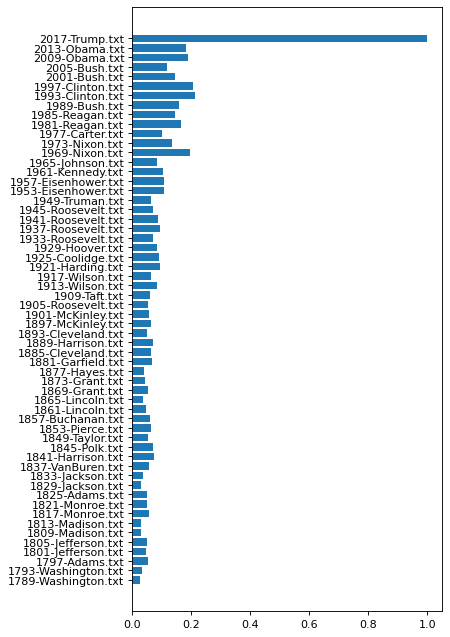

In [35]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(5, 10), dpi=80, facecolor='w', edgecolor='k')
y_pos = numpy.arange(len(filenames))
matplotlib.pyplot.barh(y_pos,similarities,tick_label=filenames)

---
# Ejercicios


2.   Determinar cuál es el par de discursos más similares entre sí y cuál es el par de discursos menos similares entre sí.


Invertimos el diccionario `filename_to_id`

In [36]:
id_to_filename= {v: k for k, v in filename_to_id.items()}

In [60]:
id_to_filename

{0: '1789-Washington.txt',
 1: '1793-Washington.txt',
 2: '1797-Adams.txt',
 3: '1801-Jefferson.txt',
 4: '1805-Jefferson.txt',
 5: '1809-Madison.txt',
 6: '1813-Madison.txt',
 7: '1817-Monroe.txt',
 8: '1821-Monroe.txt',
 9: '1825-Adams.txt',
 10: '1829-Jackson.txt',
 11: '1833-Jackson.txt',
 12: '1837-VanBuren.txt',
 13: '1841-Harrison.txt',
 14: '1845-Polk.txt',
 15: '1849-Taylor.txt',
 16: '1853-Pierce.txt',
 17: '1857-Buchanan.txt',
 18: '1861-Lincoln.txt',
 19: '1865-Lincoln.txt',
 20: '1869-Grant.txt',
 21: '1873-Grant.txt',
 22: '1877-Hayes.txt',
 23: '1881-Garfield.txt',
 24: '1885-Cleveland.txt',
 25: '1889-Harrison.txt',
 26: '1893-Cleveland.txt',
 27: '1897-McKinley.txt',
 28: '1901-McKinley.txt',
 29: '1905-Roosevelt.txt',
 30: '1909-Taft.txt',
 31: '1913-Wilson.txt',
 32: '1917-Wilson.txt',
 33: '1921-Harding.txt',
 34: '1925-Coolidge.txt',
 35: '1929-Hoover.txt',
 36: '1933-Roosevelt.txt',
 37: '1937-Roosevelt.txt',
 38: '1941-Roosevelt.txt',
 39: '1945-Roosevelt.txt',
 

In [37]:

similarities = numpy.zeros((num_documents,num_documents))

for j in range (-1,58):
    for i in range(0,j):
        similarities[j,i]=numpy.dot(normalized_tfidf_matrix[filename_to_id[id_to_filename[i]]],normalized_tfidf_matrix[filename_to_id[id_to_filename[j]]])
   
similarities

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.061, 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.147, 0.043, 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.065, 0.012, 0.089, ..., 0.   , 0.   , 0.   ],
       [0.051, 0.025, 0.069, ..., 0.236, 0.   , 0.   ],
       [0.028, 0.034, 0.054, ..., 0.19 , 0.183, 0.   ]])

In [38]:
mas=numpy.where(similarities == numpy.amax(similarities))
menos=numpy.where(similarities == numpy.amin(similarities))
print(mas, menos)

(array([8], dtype=int64), array([7], dtype=int64)) (array([ 0,  0,  0, ..., 56, 56, 57], dtype=int64), array([ 0,  1,  2, ..., 56, 57, 57], dtype=int64))


In [39]:
id_to_filename[7],id_to_filename[8]

('1817-Monroe.txt', '1821-Monroe.txt')

De lo anterior vemos que los dos discursos inaugurales que más coinciden son los de ambos mandatos del presidente Monroe.

Para ver un panorama general de las similaridades, imprimimos un `heatmap`

<AxesSubplot:>

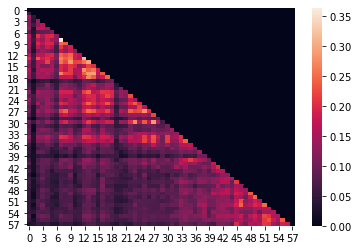

In [40]:
import seaborn as sns 
sns.heatmap(similarities)

3.Dado un texto ingresado por el usario y un umbral de similitud *t*, devolver una lista con los identificadores de archivos de aquellos discursos cuya similutud al texto sea mayor a *t*.  La lista debe estar ordenada de mayor a menor grado de similitud al texto ingresado.


In [41]:
# Cargo con una oración sencilla
sent_mlk = "Free at last, free at last! Thank God almighty! I am free at last!"
tokens_lowercase_mlk = [word.lower() for word in nltk.word_tokenize(sent_mlk)]
terms_mlk =set()
#Filtro los terminos que me coinciden con los que aparecen en los discursos estudiados 
for token in tokens_lowercase_mlk:
    if token in term_set: #lista de palabras consideradas en el problema en cuestión:
        token = stemmer.stem(token)
        terms_mlk.add(token)

In [42]:
terms_mlk.discard('almighti')
#No sé porqué lo cuenta si trae problemas, pero lo elimino a mano del cjto, esto lo vi con unos errores previos de celdas ya borradas 

In [43]:
#Confecciono un vector que registre la cantidad de veces que aparecen los términos de interés comparable con los ya tenidos 
v=np.zeros(num_terms)
for x in terms_mlk:
    v[term_to_id[x]]=float(sent_mlk.count(x))
v


array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
#Necesito darle el "puntaje" a cada componente no nula del vector, y lo alamacenaré en un vector w basado en mi vector anterior v
w=np.zeros(num_terms)
for term in term_set:
  term_document_frequency = 0
  for document in corpus:
    if term in document:
      term_document_frequency += 1
  w[term_to_id[term]] = math.log(float(num_documents) / float(term_document_frequency),10)*v[term_to_id[term]]

In [45]:
#normalizamos nuestro nuevo vector 2
w=w/numpy.linalg.norm(w)

In [46]:
import pandas as pd

Para t=0.001 calculo el grado de similitud 

In [64]:
df=pd.DataFrame()
df['archivo']=[]
df['grado de similitud']=[]
t=0.001
i=1
for j in range(0,num_documents):
    if numpy.dot(normalized_tfidf_matrix[j,:],w) > t:
      df.loc[i]=[ id_to_filename[j], numpy.dot(document,w) ]  
i+=1

In [65]:
df

,archivo,grado de similitud
1,2013-Obama.txt,0.000616


Más general, busco definir una función 

In [77]:
def coincidencias(text, t):
    sent_mlk=text
    tokens_lowercase_mlk = [word.lower() for word in nltk.word_tokenize(sent_mlk)]
    terms_mlk =set()
    #Filtro los terminos que me coinciden con los que aparecen en los discursos estudiados 
    for token in tokens_lowercase_mlk:
        if token in term_set: #lista de palabras consideradas en el problema en cuestión:
            token = stemmer.stem(token)
            terms_mlk.add(token)
    terms_mlk.discard('almighti') #por las dudas! 
    v=np.zeros(num_terms)
    for x in terms_mlk:
        v[term_to_id[x]]=float(sent_mlk.count(x))
    w=np.zeros(num_terms)
    for term in term_set:
      term_document_frequency = 0
      for document in corpus:
        if term in document:
          term_document_frequency += 1
      w[term_to_id[term]] = math.log(float(num_documents) / float(term_document_frequency),10)*v[term_to_id[term]]
    w=w/numpy.linalg.norm(w)
    df=pd.DataFrame()
    df['archivo']=[]
    df['grado de similitud']=[]
    i=1
    for j in range(0,num_documents):
        if numpy.dot(normalized_tfidf_matrix[j,:],w) > t:
          df.loc[i]=[ id_to_filename[j], numpy.dot(normalized_tfidf_matrix[j,:],w) ]  
    i+=1
    df=df.sort_values('grado de similitud')
    return df

Lo pruebo con la frase sencilla de Martin Luther King para ver si da el mismo resultado: 

In [78]:
c=coincidencias('Free at last, free at last! Thank God almighty! I am free at last', 0.001)
c

,archivo,grado de similitud
1,2013-Obama.txt,0.018841




---
# Ejemplo 5

Crear un índice invertido simple.


In [50]:
term_to_document_ids ={}
for term in term_set:
  term_id = term_to_id[term]
  document_ids = [] 
  term_column = tf_matrix[:,term_to_id[term]]
  for idx in range(0, len(term_column)): 
    if term_column[idx] > 0: 
        document_ids.append(idx) 
  term_to_document_ids[term] = document_ids; 

In [51]:
term_to_document_ids

{'band': [8, 55],
 'trap': [45, 57],
 'french': [2, 9, 41],
 'conquer': [6, 10, 23, 36, 43, 44, 45, 49, 50, 53],
 'name': [2, 3, 6, 8, 9, 13, 27, 28, 30, 32, 34, 42, 49, 50, 52, 54, 56],
 'juri': [3, 35],
 'human': [0,
  2,
  4,
  5,
  6,
  8,
  9,
  10,
  12,
  13,
  14,
  16,
  17,
  18,
  21,
  22,
  24,
  26,
  28,
  31,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  45,
  46,
  47,
  48,
  49,
  52,
  53,
  54,
  55,
  56],
 'glorifi': [33],
 'autocrat': [37],
 'cash': [31, 57],
 'vest': [8, 13, 15, 25, 27],
 'deter': [41],
 'eject': [25],
 'children': [4,
  8,
  12,
  14,
  16,
  17,
  23,
  29,
  31,
  35,
  37,
  39,
  44,
  46,
  48,
  50,
  51,
  52,
  53,
  55,
  56,
  57],
 'seventy-two': [18],
 'inner': [47, 57],
 'exampl': [2,
  5,
  6,
  7,
  8,
  9,
  10,
  12,
  13,
  14,
  15,
  16,
  17,
  22,
  24,
  25,
  27,
  33,
  34,
  35,
  37,
  40,
  53,
  55],
 'avoid': [0,
  5,
  12,
  13,
  14,
  17,
  18,
  24,
  25,
  26,
  27,
  28,
  30,
  32,
  3

---
#Ejercicios

4.   Repita el ejercicio 3 haciendo uso del índice (además de utilizar la matriz TF-IDF).
5. Identifique las limitaciones del índice invertido simple implementado.